# ***` Logistic Regression `***

***` Import the Iris data which discusses about three species of flowers namely "Setosa","Verisicolor" and "Virginica" Your task is to build a logistic regression model to distinguish between two  of these speicies using features like "Sepal Length", "Sepal Width", "Petal Length" and "Petal Width"`***

`1)Write a sigmoid function and visualize the sigmoid function,by considering x in the range of (-10,10).`

`2)Plot impact of logloss for single forecasts (You can import log_loss from sklearn.metrics). Make predictions as 0 to 1 in 0.01 increments. (For example,yhat = [x*0.01 for x in range(0, 101)]).Evaluate predictions for a 0 true value.Plot a graph between y_hat and log_loss`

`3)Find the difference between minimum log loss for label 0 and label 1 [1.5 marks]`

`3)Import the Iris Data, and visualize the data to an idea about it.`

`4)Convert the char labels to numerical as logistic regression takes only 0's and 1's and then create new array of numerical labels.After following the procedure as mentioned in the comments , find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1).[1 marks]`

`5)Split the data in X,y and convert them into arrays`

`6)Use sklearn to split the data (**Important** Consider random_state=42 and test_size=0.2)and perform Logistic Regression`

`7)Find the weights and bias and save it in a list[5 marks]`

`8)Make a prediction on the test data.Find the accuracy of the prediction.[1 marks]`

`9)Also predict the species of the flower whose sepal length=4.9cm	sepal width=4cm	petal length=1.2cm	petal width=0.4cm and return the Species of the data.[1.5 marks]`


In [1]:
# Run this cell
# import important libraries library
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
ans = [0]*5

# ***`Importing and Visualizing Data`***



In [2]:
#Sigmoid Function
def sigmoid(x):
    return (1/(1 + np.exp(-x)))

Text(0, 0.5, 'y = sigmoid(x)')

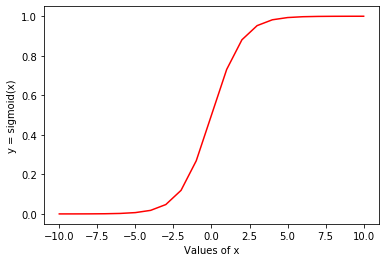

In [3]:
#Visualize sigmoid function
#Create an array of x_val with values between -10 and 10 
x_val = [i for i in range(-10, 11)]
#Find y_val, by using sigmoid function
y_val = [sigmoid(i) for i in x_val]
#Plot x_val,y_val and label the graph
plt.plot(x_val, y_val, color = 'r')
plt.xlabel('Values of x')
plt.ylabel('y = sigmoid(x)')

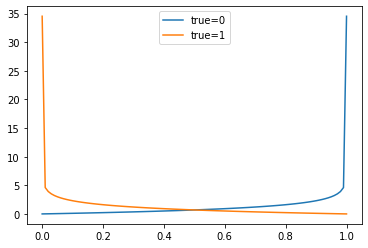

In [4]:
# Plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]

# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0, 1]) for x in yhat]

# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0, 1]) for x in yhat]

# plot input to loss
plt.plot(yhat, losses_0, label='true=0')
plt.plot(yhat, losses_1, label='true=1')
plt.legend()
plt.show()

In [5]:
#Find the difference between minimum log loss for label 0 and label 1 
ans[0] = min(losses_1) - min(losses_0)

In [6]:
ans[0]

0.0

# ***`Processing the Data`***

In [7]:
#Import the dataset of iris from datasets.load_iris()
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df['class'] = iris.target

In [8]:
list(iris.feature_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
#Look into the top 5 rows of data
iris_df.head(5)

,0,1,2,3,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


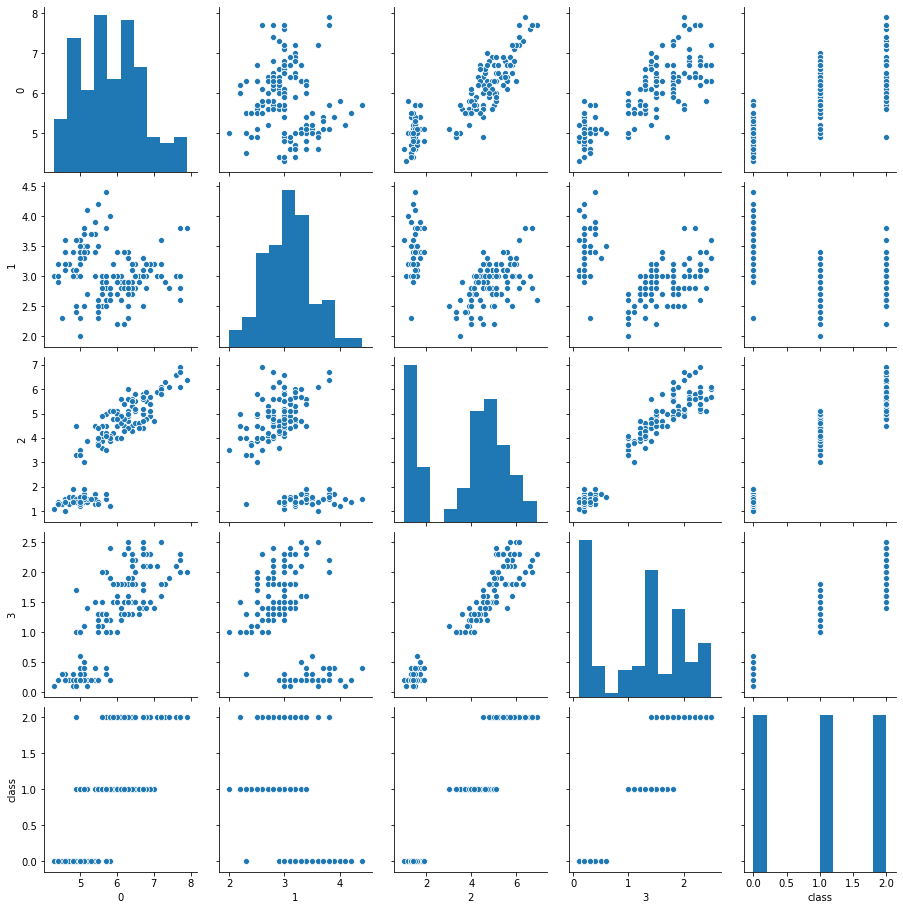

In [10]:
#Visualize  the data using seaborn pairplot
sns.pairplot(iris_df)

In [11]:
iris_df.describe()

,0,1,2,3,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
# Convert char labels into numerical 
#import LabelEncoder which returns array of encoded labels
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Create new array of numerical labels
new_array = labelencoder.fit_transform(iris_df['class'])

In [13]:
new_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [14]:
# Drop old labels(char) data 
iris_df = iris_df.drop(['class'], axis = 1)

# Substitute new labels(numerical) into data
iris_df['Target'] = new_array

In [15]:
# Logistic regression only takes the data which has labels 0 and 1, so consider only data['labels']<2
# Considering Iris-setosa as "0" and Iris-versicolor as "1"
iris_df = iris_df[iris_df['Target'] < 2]

In [16]:
#Find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1)
ans[1] = iris_df.loc[iris_df['Target'] == 0][0].mean() - iris_df.loc[iris_df['Target'] == 1][0].mean()

# ***`Obtaining Weight Values`***

In [17]:
# Split the data into X and y
cols = list(iris_df.columns)
cols.remove('Target')

x = iris_df[cols]
y = iris_df['Target']

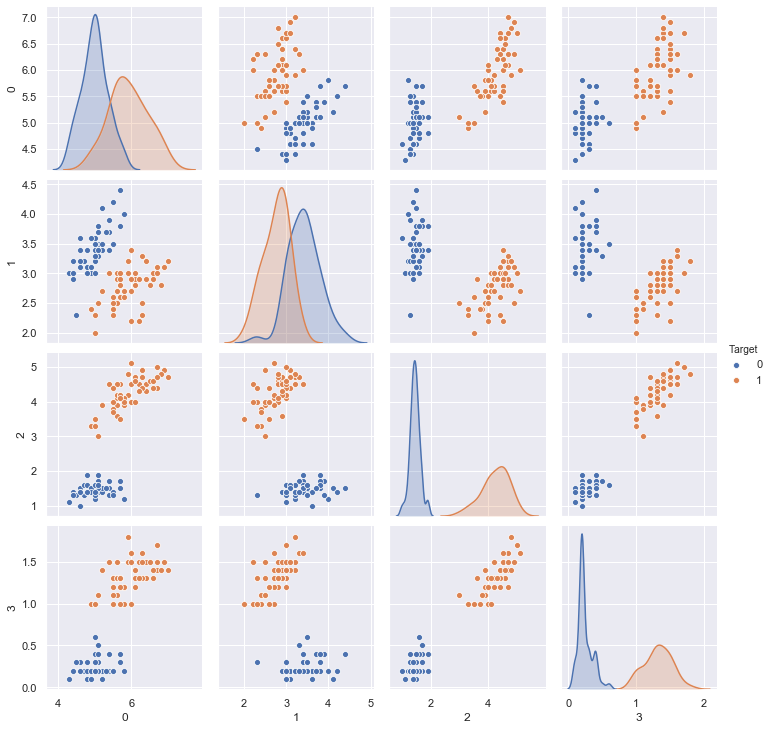

In [18]:
# Visualize X,y
import seaborn as sns

sns.set()
sns.pairplot(iris_df[list(iris_df.columns)], hue="Target", diag_kind="kde")

In [19]:
# Convert X,y into arrays
cols = list(iris_df.columns)
cols.remove('Target')

x = iris_df[cols]
y = iris_df['Target']

In [20]:
#Using sklearn to split the data
from sklearn.model_selection import train_test_split
#Take the test size as 0.2 and random_state as 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [21]:
#Importing Necessary Libraries for Logistic Regression 
from sklearn.linear_model import LogisticRegression

#Building our model
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

#Finding the parameter and bias
parameter = classifier.coef_.tolist()
bias = classifier.intercept_.tolist()

In [22]:
#Printing the parameters and bias
print(parameter)
print(bias)

[[0.4580817106794404, -0.8389565384015344, 2.2168424707599437, 0.9236259535228264]]
[-6.5266650038990734]


In [23]:
#Save parameters and bias [w1,w2,w3,w4,b] as one vector 
#i.e if the answer should be in a 1 dimensional list

final = []
for i in parameter[0]:
    final.append(i)
final.append(bias[0])

ans[2] = final

In [24]:
#Predicitng on our test data
y_pred = classifier.predict(x_test)

In [25]:
#Finding the accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
ans[3] = acc

In [26]:
print(ans[3])

1.0


In [27]:
#Predict for the input [4.9,4,1.2,0.4] , save the answer ans[4] "Setosa" or "Versicolor"
y_pred = classifier.predict([[4.9,4,1.2,0.4]])
print(y_pred)

[0]


In [28]:
#The class of the input 
ans[4] = "Setosa"

In [29]:
import json
ans = [str(item) for item in ans]

filename = "aryanpcm@gmail.com_Aryan_Singh_LogisticRegression"

# Eg if your name is Saurav Joshi and email id is sauravjoshi123@gmail.com, filename becomes
# filename = sauravjoshi123@gmail.com_Saurav_Joshi_LogisticRegression

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [30]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

ModuleNotFoundError: No module named 'findScore'

In [31]:
for i in ans:
    print(i)

0.0
-0.9300000000000006
[0.4580817106794404, -0.8389565384015344, 2.2168424707599437, 0.9236259535228264, -6.5266650038990734]
1.0
Setosa
